<a href="https://colab.research.google.com/github/VinayR1998/Global-Terrorism-Analysis1/blob/main/Vinay_R_EDA_1_GTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# In the wake of terrorist attacks of 11 September 2001 also notoriously known as the 9/11 attack , the United Nations created the Counter-Terrorism Committee. The committee then went on to take measures for assisting member countries in terror attack mitigation and defence but failed to be effective. The committee then started thinking about the bigger picture and with the prohibtion of incitement to commit terrrorist acts resolution in 2014.It changed its SOP.

#The committee gathered a data science team to find the root cause for terrorism ,the data science team decided to make use of the START terrorism database to find some patterns.As a subpart of the data science team we are tasked with exploring,cleaning and finding the key points from the databse. Now let's go ahead and make it work.

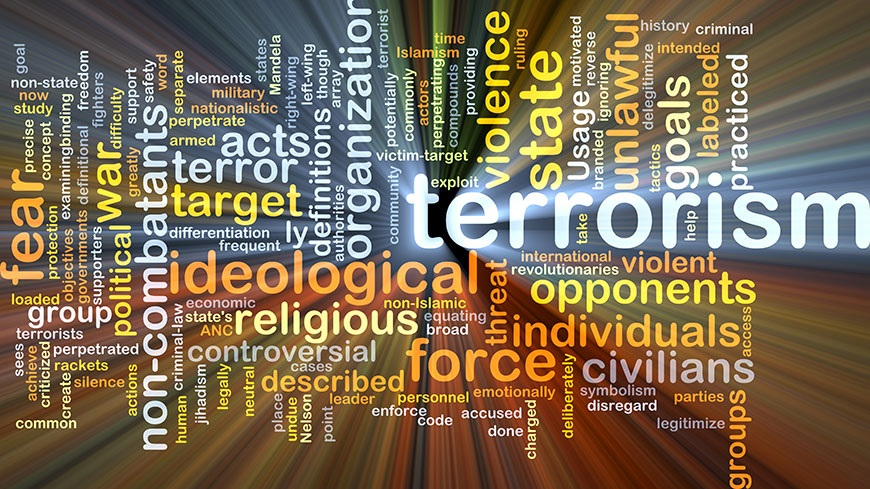

##**Importing libraries for data manipulation and visualization**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (20,10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading data
try:
  location1 = "/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv"
  df= pd.read_csv(location1, encoding = 'ISO-8859-1',low_memory=False)
  pass

except FileNotFoundError:
  pass

try:
  location3 = "/content/drive/MyDrive/Colab Notebooks/project/My project/Global Terrorism Data.csv"
  df= pd.read_csv(location3, encoding = 'ISO-8859-1',low_memory=False)
  pass

except FileNotFoundError:
  pass 


try:
  location2 = "/content/drive/MyDrive/appsheet/terrorism.csv"
  df = pd.read_csv(location2, encoding = 'ISO-8859-1',low_memory=False)
  pass
except FileNotFoundError:
  pass

gtd = df.copy()


In [ ]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

#**Cleaning the dataset for optimized working**


In [ ]:
#listing the required columns
columns_to_keep1 = ['eventid','iyear', 'imonth','country','country_txt',
 'region','region_txt','provstate','city','success',
 'attacktype1','attacktype1_txt','targtype1','targtype1_txt',
 'gname','weaptype1', 'weaptype1_txt',
 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',]


#**Creating new dataframes with selected columns**

In [ ]:
gtd_df = df[columns_to_keep1].rename(columns = {'weaptype1_txt':'weapon'})

In [ ]:
gtd_df.shape

(181691, 23)

In [ ]:

gtd_df2 = df[columns_to_keep1]

In [ ]:
gtd_df2.shape

(181691, 23)

In [ ]:

new_gtd= gtd_df2.rename(columns = {'iyear': 'year', 'imonth': 'month', 'country':"country_id",'country_txt':'country_name','region':"region_id",'region_txt':"region_name",'attacktype1':'attacktype_id','attacktype1_txt':'attacktype','targtype1':'targtype_id', 'targtype1_txt':'targtype','weaptype1':"weapon_id",
       'weaptype1_txt':"weapon","nkillus":"civilians killed","nkillter":"terrorists killed"})

In [ ]:
gtd_df.head()

,eventid,iyear,imonth,country,country_txt,region,region_txt,provstate,city,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,weaptype1,weapon,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
0,197000000001,1970,7,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,NaN,NaN,0.0,NaN,NaN
1,197000000002,1970,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,NaN,NaN,0.0,NaN,NaN
2,197001000001,1970,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,NaN,NaN,0.0,NaN,NaN
3,197001000002,1970,1,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN


#**Replacing NaN values with "0" for ease of manipulation**

In [ ]:
df.fillna(0)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,14,Private Citizens & Property,68.0,Named Civilian,0,Julio Guzman,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,6,Hostage Taking (Kidnapping),0.0,0,0.0,0,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,1.0,1.0,0.0,0.0,0.0,0,Mexico,1.0,800000.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Embassy,...,0.0,0,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,0,0,1,1,1,-9.0,0.0,0,0.0,1,0,7,Facility/Infrastructure Attack,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Consulate,...,0.0,0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,0,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,0.0,0,0.0,0,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,0.0,0,0,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,0
181687,201712310029,2017,12,31,0,0,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Ac

In [ ]:
gtd_df.shape

(181691, 23)

#**1. Trend in the number of terror attacks over the past five decades**





In [ ]:
 gtd_df1 = gtd_df.groupby('iyear')['eventid'].count().reset_index().rename(columns = {'iyear':'year', 'eventid':'no_of_attacks'})



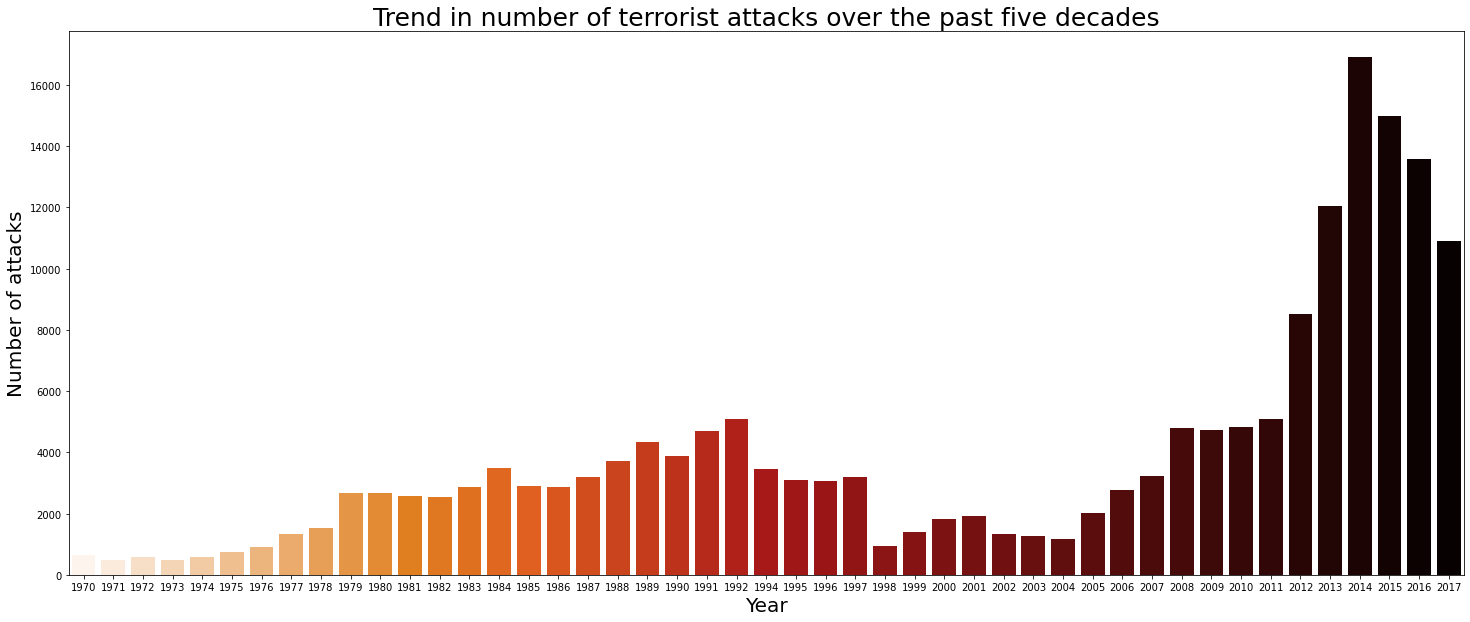

In [ ]:

plt.rcParams["figure.figsize"]=(25,10)
sns.barplot(data = gtd_df1
            ,x = 'year'
            ,y = 'no_of_attacks',palette ='gist_heat_r'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Trend in number of terrorist attacks over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

### **Inferences**
### The year **2014**  endured the the most number of terror attacks i.e **16903** attacks.Uff!! looks like 2014 saw lot of violence and chaos.
### Since 2014 we can observe a downward trend in the number of terror attacks.
.

#**2. Most vulnerable target types**


In [ ]:
gtd_df2 = gtd_df.targtype1_txt.value_counts().reset_index().rename(columns = {'index':'Target type','targtype1_txt':'Number of attacks' })

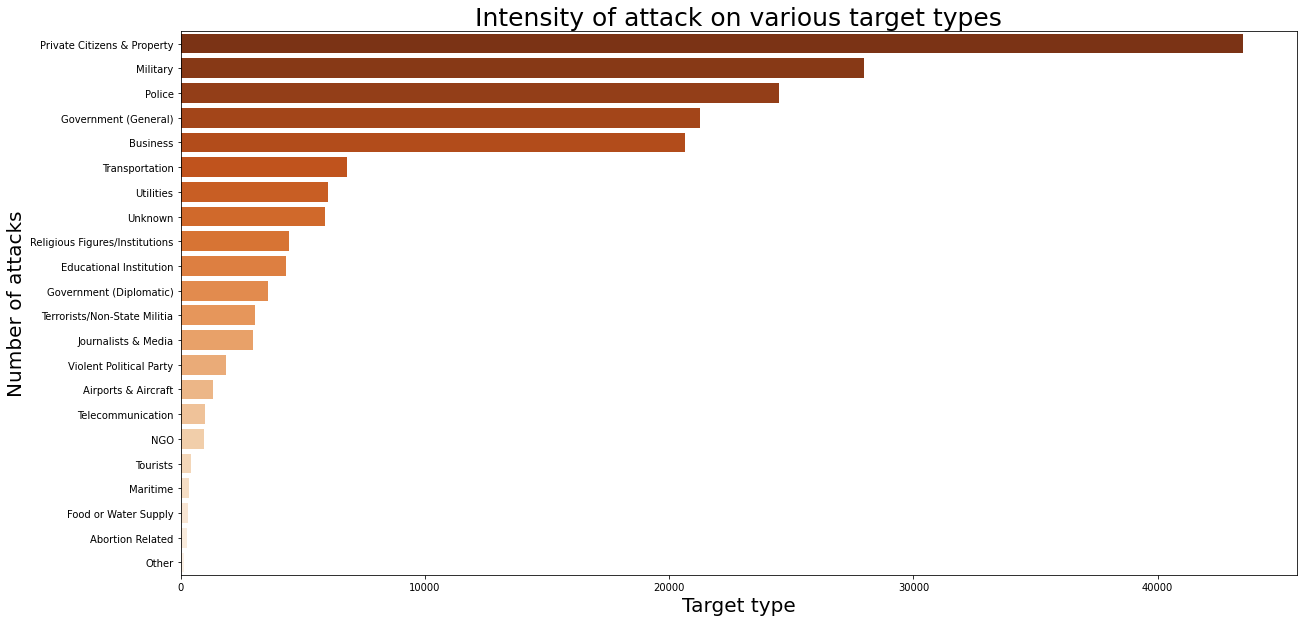

In [ ]:
plt.rcParams["figure.figsize"]=(20,10)
sns.barplot(data = gtd_df2
            ,x = 'Number of attacks'
            ,y = 'Target type', ci = None,palette = 'Oranges_r'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Intensity of attack on various target types",fontsize=25)
plt.xlabel("Target type",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

In [ ]:
gtd_df.targtype1_txt.value_counts().reset_index()[:5]

,index,targtype1_txt
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669


##**Inference**
##**Private citizens and property** are the most vulnerable terror targets followed by the **Military personnel** who are always indulged in fending off terrorists and neutralizing them, which invariably puts them in harms way

# **3. Wrath of the Terrorist Arsenal**

##By observing the trend in the number of terror attacks, one cannot help but imagine that the number of casualties will also follow the same trend. However, there are many types of terror attacks and hence we cannot be a 100% sure that it will follow the same trend. Lets dive in and we shall let the statistics do the talking for us.

In [ ]:
 gtd_df3 = gtd_df.groupby('weapon').agg({'nkill':'sum'}).rename(columns = {'nkill':'deaths'}).reset_index().sort_values("deaths", ascending=False)

In [ ]:
gtd_df3.head(20)


,weapon,deaths
4,Firearms,174894.0
2,Explosives,174277.0
10,Unknown,42620.0
6,Melee,10575.0
5,Incendiary,5476.0
11,Vehicle (not to include vehicle-borne explosiv...,3184.0
1,Chemical,624.0
7,Other,123.0
9,Sabotage Equipment,83.0
0,Biological,9.0


In [ ]:
gtd_df3.weapon[0] = 'Vehicle'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


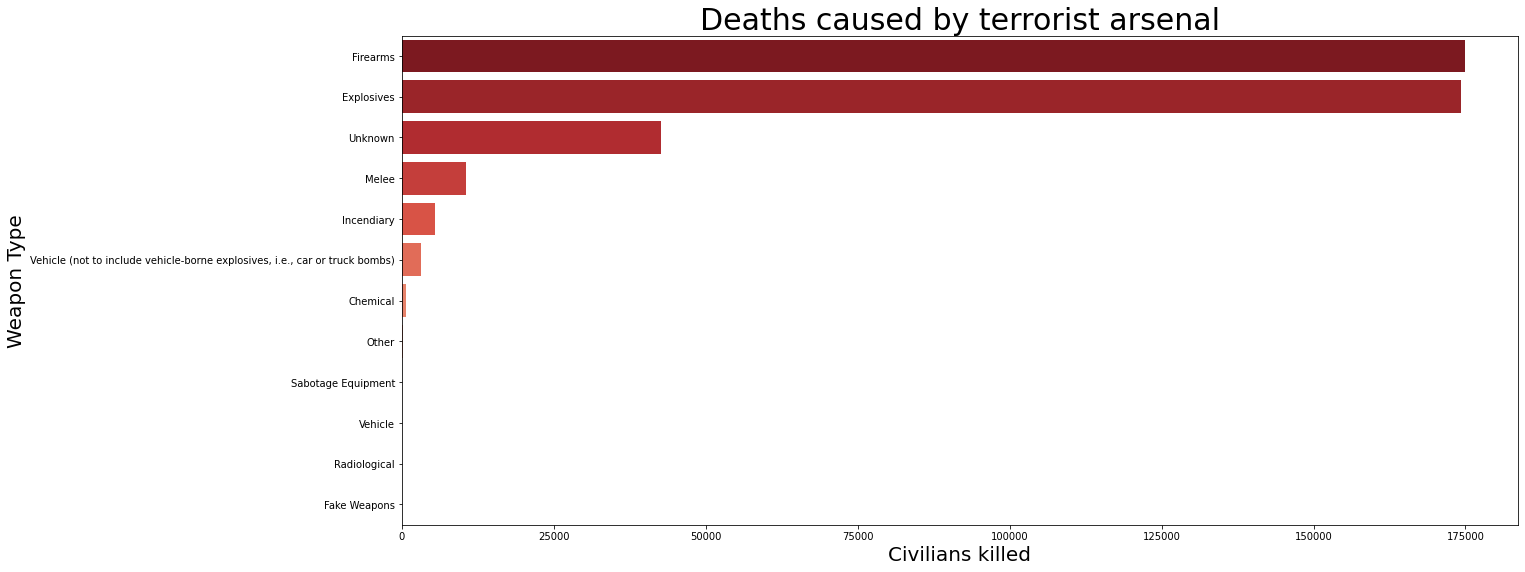

In [ ]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = gtd_df3
            ,x = 'deaths'
            ,y = 'weapon', ci = None, palette = 'Reds_r'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Deaths caused by terrorist arsenal",fontsize=30)
plt.xlabel("Civilians killed",fontsize=20)
plt.ylabel("Weapon Type",fontsize=20)
plt.show()


##**Inference**
## Explosives and firearms are the most dangerous weapons in the terrorist arsenal, amounting to kills close to a hundred thousand.

#**4.Deadliest Terror Groups**

In [ ]:
df10=gtd.groupby("gname")["nkill"].sum().reset_index().rename(columns = {'gname':'Terror Group', 'nkill':'Deaths'}).sort_values(by ='Deaths',ascending = False)

In [ ]:
df10[1:12]

,Terror Group,Deaths
1535,Islamic State of Iraq and the Levant (ISIL),38923.0
3138,Taliban,29410.0
704,Boko Haram,20328.0
2948,Shining Path (SL),11601.0
1864,Liberation Tigers of Tamil Eelam (LTTE),10989.0
177,Al-Shabaab,9330.0
1120,Farabundo Marti National Liberation Front (FMLN),8065.0
2276,Nicaraguan Democratic Force (FDN),6662.0
3165,Tehrik-i-Taliban Pakistan (TTP),6042.0
2717,Revolutionary Armed Forces of Colombia (FARC),5661.0


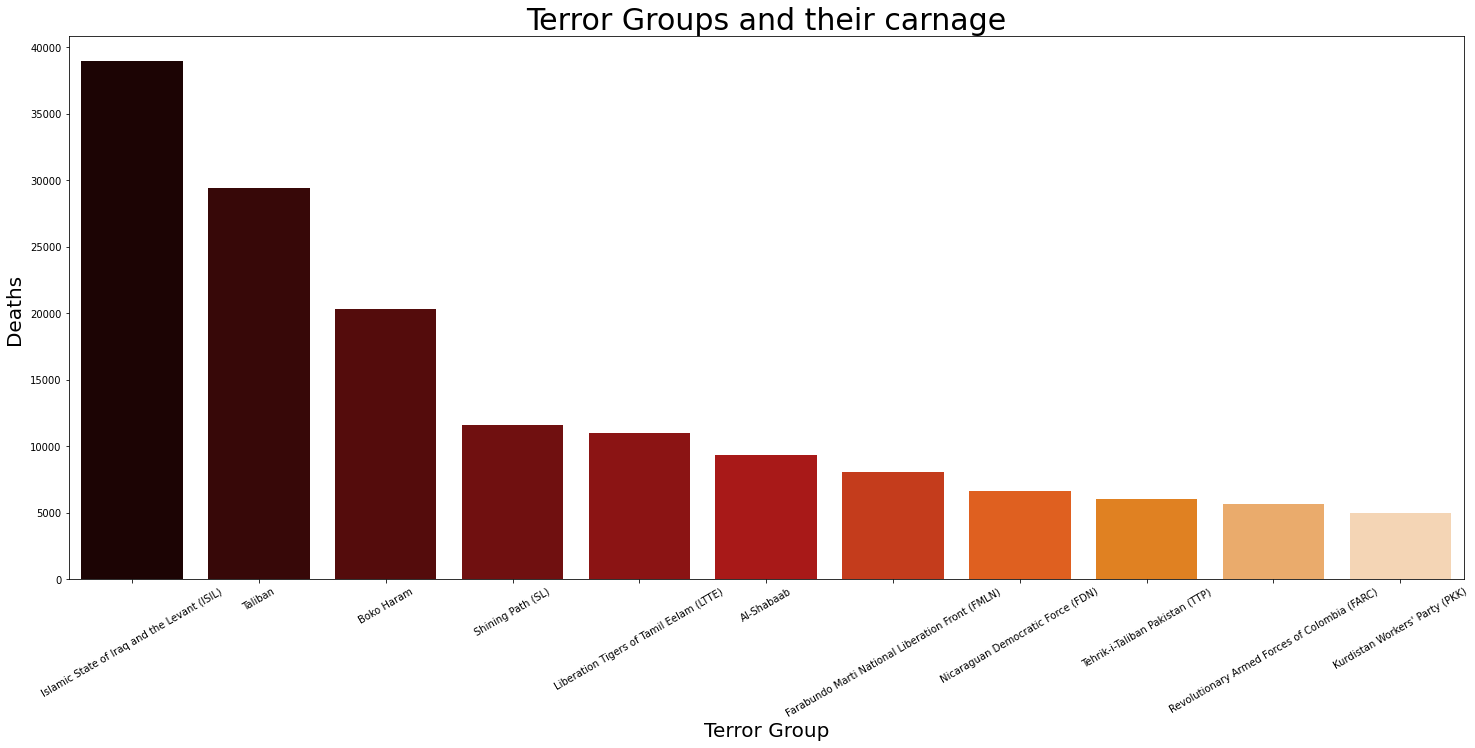

In [ ]:
sns.barplot(data = df10[1:12], x = 'Terror Group', y = 'Deaths', palette = 'gist_heat').tick_params(axis='x', rotation=30)
plt.rcParams["figure.figsize"]=(25,10)
plt.title('Terror Groups and their carnage', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Deaths ', fontsize = 20)
plt.show()